In [27]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [2]:
# Read in the dataset
df = pd.read_csv('../datasets/merged_df_mon.csv')

In [3]:
df.head()

,Country Name,Country Code,rural_pop_percent_17,food_production_index_17,ag_land_area_17,arable_land_percent_2017,net_migration_2017,hiv_prevalence_2017,mat_mortality_ratio_2017,under5_mortality_ratio_2017,...,cell_subscriptions_per100,internet_per_mil_2017,military_exp_2017,women_seats_percent_2017,male_bus_start_2017,female_bus_start_2017,patent_apps_2017,sci_articles_2017,pop_density_2017,HDI
0,Afghanistan,AFG,74.750,99.169998,58.067580,11.792727,-314602.0,0.1,638.0,64.8,...,65.929134,43.448181,0.945227,27.710843,8.0,9.0,NaN,91.89,55.595550,0.509
1,Angola,AGO,35.161,103.419998,45.237371,3.930376,32066.0,1.9,241.0,80.6,...,44.686107,10.799292,2.507985,30.454545,36.0,36.0,NaN,55.50,23.916555,0.582
2,Albania,ALB,40.617,103.980003,42.670839,22.149635,-69998.0,0.1,15.0,9.4,...,125.710352,443.020376,1.108696,27.857143,5.0,5.0,16.0,149.54,104.870693,0.792
3,Andorra,AND,11.850,NaN,40.042553,1.744681,NaN,NaN,NaN,3.0,...,104.332411,3415.717495,NaN,32.142857,NaN,NaN,NaN,2.01,163.823404,0.867
4,United Arab Emirates,ARE,13.752,104.180000,5.404112,0.626584,200000.0,0.1,3.0,7.2,...,208.978600,1285.099111,NaN,22.500000,8.0,9.0,63.0,2899.67,133.584990,0.889


In [6]:
df.fillna(0, inplace=True)
df.isnull().sum()

Country Name                   0
Country Code                   0
rural_pop_percent_17           0
food_production_index_17       0
ag_land_area_17                0
arable_land_percent_2017       0
net_migration_2017             0
hiv_prevalence_2017            0
mat_mortality_ratio_2017       0
under5_mortality_ratio_2017    0
tubercul_incidence_2017        0
elec_access_2017               0
ren_energy_percent_2017        0
ffuel_energy_percent_2017      0
co2_emissions_2017             0
pop_air_pollution_2017         0
foreign_dir_inv_2017           0
atm_access_2017                0
adol_fertility_rate_2017       0
fem_labor_part_rate_2017       0
male_labor_part_rate_2017      0
fertility_rate_2017            0
dpt_immuniz_rate_2017          0
undernourished_rate_2017       0
cell_subscriptions_per100      0
internet_per_mil_2017          0
military_exp_2017              0
women_seats_percent_2017       0
male_bus_start_2017            0
female_bus_start_2017          0
patent_app

-----
### K-means Clustering 

In [8]:
X = df.drop(columns = ['Country Name', 'Country Code', 'ffuel_energy_percent_2017', 'HDI'])

In [9]:
ss = StandardScaler()
X_ss = ss.fit_transform(X)

In [10]:
# went with 4 as there are 4 cutoffs for development levels with HDI
km = KMeans(n_clusters = 4, random_state=42)
km.fit(X_ss)

KMeans(n_clusters=4, random_state=42)

In [11]:
km.labels_

array([3, 3, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 0, 3, 3, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 3, 0, 0, 0, 2, 3, 3, 3, 3, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 3, 0, 1, 0, 1, 1, 0, 0, 1, 3, 3, 3, 3,
       0, 1, 1, 1, 0, 1, 0, 3, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 3,
       1, 1, 1, 0, 0, 0, 1, 0, 3, 0, 1, 1, 1, 3, 0, 0, 0, 0, 0, 3, 0, 0,
       1, 0, 3, 0, 1, 0, 0, 3, 3, 0, 3, 0, 1, 3, 3, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 3, 0, 1, 1, 0, 1, 3, 0, 0, 3,
       1, 1, 0, 0, 0, 3, 0, 1, 3, 3, 0, 1, 0, 1, 1, 0, 0, 0, 3, 3, 0, 0,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3], dtype=int32)

In [14]:
df['cluster'] = km.labels_

In [15]:
df.groupby('cluster').mean()

,rural_pop_percent_17,food_production_index_17,ag_land_area_17,arable_land_percent_2017,net_migration_2017,hiv_prevalence_2017,mat_mortality_ratio_2017,under5_mortality_ratio_2017,tubercul_incidence_2017,elec_access_2017,...,cell_subscriptions_per100,internet_per_mil_2017,military_exp_2017,women_seats_percent_2017,male_bus_start_2017,female_bus_start_2017,patent_apps_2017,sci_articles_2017,pop_density_2017,HDI
cluster,,,,,,,,,,,,,,,,,,,,,
0,25.990511,100.704348,37.001428,15.315057,1.534099e+05,0.226087,22.141304,9.275000,33.702174,25.990511,...,125.986700,11370.559992,1.746840,22.995546,13.006848,13.137283,6529.282609,14380.820326,336.913011,0.837054
1,54.440070,104.429123,35.585155,11.847294,-2.492399e+05,1.254386,124.157895,30.721053,160.441404,54.440070,...,96.506565,922.762118,1.032429,18.157938,33.680789,33.768509,372.771930,3169.855789,161.876887,0.662719
2,29.991000,102.410000,50.221359,14.961180,1.516016e+06,0.200000,24.000000,7.900000,32.550000,29.991000,...,113.241628,15272.841359,2.529918,21.801222,15.250000,15.250000,769806.500000,452827.500000,91.843360,0.840000
3,61.874278,105.033056,47.789766,16.674864,-6.146153e+04,4.522222,536.861111,77.597222,237.000000,61.874278,...,71.857015,17.960528,1.443677,19.915174,21.928333,22.067222,9.055556,334.685833,99.992952,0.503972


In [17]:
km.inertia_

3870.7584684670737

In [18]:
silhouette_score(X_ss, km.labels_)

0.13961642633981403

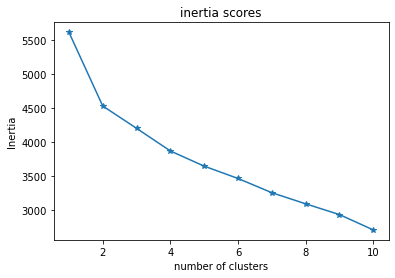

In [22]:
# the below code was adapted from lesson 7.01 on k-means clustering
inertia_list = []

for k in range(1,11):
    km = KMeans(n_clusters= k, random_state=42)
    km.fit(X_ss)
    inertia_list.append(km.inertia_)

plt.plot(range(1,11), inertia_list, marker = '*');
plt.xlabel('number of clusters')
plt.ylabel('Inertia')
plt.title('inertia scores');

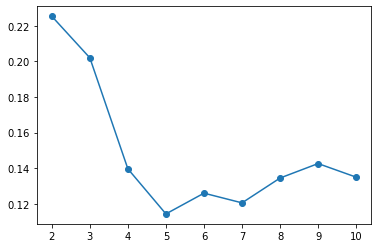

In [24]:
silhouette_list = []

for k in range(2,11):
    km = KMeans(n_clusters = k, random_state= 42)
    km.fit(X_ss)
    silhouette_list.append(silhouette_score(X_ss, km.labels_))

plt.plot(range(2,11), silhouette_list, marker='o');

In [25]:
# doesn't perform very well - try DBScan
# will try to use one to feed 
# into regression or classification model

In [64]:
# went with 4 as there are 4 cutoffs for development levels with HDI
km = KMeans(n_clusters = 2, random_state=42)
km.fit(X_ss)

KMeans(n_clusters=2, random_state=42)

In [65]:
print(km.inertia_)
silhouette_score(X_ss, km.labels_)

4529.515414720577


0.22541053947667644

In [66]:
df['cluster'] = km.labels_

In [67]:
df['cluster'].value_counts()

0    125
1     62
Name: cluster, dtype: int64

In [68]:
cluster_0 = df.loc[df['cluster'] == 0]

cluster_1 = df.loc[df['cluster'] == 1]

-----
### DBSCAN

In [73]:
dbscan = DBSCAN()
dbscan.fit(X_ss)

DBSCAN()

In [74]:
# no clusters and all outliers. adjust parameters
pd.Series(dbscan.labels_).unique()

array([-1])

In [80]:
dbscan = DBSCAN(eps = 2, min_samples = 5)
dbscan.fit(X_ss)

pd.Series(dbscan.labels_).unique()

array([-1])

In [81]:
dbscan = DBSCAN(eps = 2.5, min_samples = 6)
dbscan.fit(X_ss)

pd.Series(dbscan.labels_).unique()

array([-1,  0])

In [82]:
print(f'Kmeans silhouette score: {silhouette_score(X_ss, km.labels_)}')
print('*'*20)
print(f'DBSCAN silhouette: {silhouette_score(X_ss, dbscan.labels_)}')

Kmeans silhouette score: 0.22541053947667644
********************
DBSCAN silhouette: -0.08581744106556478


In [83]:
# DBSCAN did not perform well (even after adjusting parameters)
# Kmeans performs better in this case

## Use KMeans output clusters for supervised model